In [6]:
%load_ext autoreload
%autoreload 2
from multigrid.envs import ConstrainedEnv
import matplotlib.pyplot as plt

env = ConstrainedEnv(render_mode="rgb_array", agents=2)


state, info = env.reset()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
self.max_steps=200


In [5]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print("CUDA Available: ", cuda_available)

CUDA Available:  False


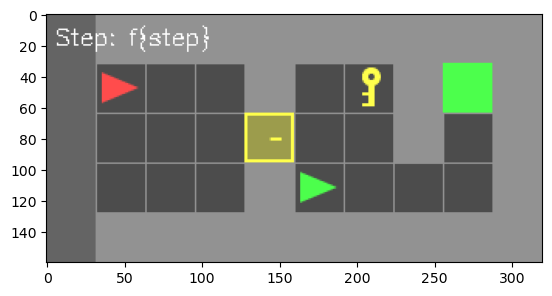

In [5]:
# Test a step and show environment is working

action = env.action_space.sample()
env.step(action)
img = env.render()
plt.imshow(img)
plt.show()


In [6]:
from DQN_multi_agent import *

In [7]:

import torch.nn as nn
import torch
import gymnasium as gym
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from typing import Dict


class MultiAgentMinigridFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.Space, features_dim: int = 512, normalized_image: bool = False) -> None:
        super().__init__(observation_space, features_dim)

        # Assume all agents have the same observation space
        agent_obs_space = observation_space.spaces[0]['image']
        n_input_channels = agent_obs_space.shape[0]

        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(16, 32, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (2, 2)),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with torch.no_grad():
            n_flatten = self.cnn(torch.as_tensor(agent_obs_space.sample()[None]).float()).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: Dict[int, Dict[str, torch.Tensor]]) -> torch.Tensor:
        # Extract image observations for each agent and pass through CNN
        image_obs = torch.stack([obs_dict['image'] for obs_dict in observations.values()])
        cnn_out = self.cnn(image_obs)

        # Pass CNN output through linear layer
        return self.linear(cnn_out)



In [8]:
action = env.action_space.sample()
print(action)
keys  =list(action.keys())
second_key = keys[1]
second_item = (second_key, action[second_key])
second_item

OrderedDict([(0, 6), (1, 3)])


(1, 3)

In [9]:
env.observation_space.spaces[0]['image'].sample()[None]

array([[[[224, 178, 104],
         [253, 161, 132],
         [219, 121,   3],
         [219,   3,  48],
         [168,  32, 232],
         [ 66,  45,  14],
         [  5, 153,  26]],

        [[ 31,  12,  66],
         [183,  41, 165],
         [104, 133, 201],
         [ 82, 253,  22],
         [172,   5, 130],
         [183, 133,   1],
         [ 92, 190,  17]],

        [[246, 151, 233],
         [ 43, 231, 254],
         [ 86,  50, 158],
         [ 69,   0, 197],
         [156,  27,  55],
         [ 46,  85,  39],
         [ 87, 219,  58]],

        [[102, 184, 137],
         [ 80,  88, 227],
         [193,  62, 108],
         [165, 210, 253],
         [ 88, 109, 190],
         [111,  42, 226],
         [ 56, 190,  39]],

        [[179, 158, 241],
         [177,  77, 216],
         [ 60, 231, 168],
         [153, 240,  41],
         [244,  63, 172],
         [215,   1,  98],
         [126, 113,  65]],

        [[145, 127, 158],
         [131,  48,  92],
         [192,  40, 204],
  

In [10]:
agent = Agent(env)
agent.train(1,env)
print("we did it")

Dict(0: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')), 1: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')))
[[[ 88 182 101]
  [ 11 132  44]
  [ 39  51 128]
  [189 244  58]
  [104  38 157]
  [108 222 208]
  [234   2  83]]

 [[233  70 144]
  [147 125 118]
  [ 71  61 161]
  [239  18 156]
  [205 228  46]
  [  2 137 226]
  [129 254 154]]

 [[174 101 184]
  [116 248 172]
  [125  15 232]
  [ 85  31 255]
  [217  13 169]
  [125 132  27]
  [210  41 131]]

 [[ 30 219 192]
  [129 174 203]
  [172  73 212]
  [145 234 144]
  [ 42 102 248]
  [140 115 255]
  [248  76 153]]

 [[124 177  87]
  [205  56 108]
  [104 245 174]
  [183 255 123]
  [ 32 240 115]
  [ 82   3 178]
  [203 106  51]]

 [[217  88 107]
  [171  27 119]
  [ 33 127 183]
  [ 44 158 179]
  [153  72  33]
  [143  87   7]
  [ 11 153 133]]

 [[ 26   6 148]
  [ 18 

: 

In [ ]:
print(env.observation_space)

Dict(0: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')), 1: Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), int64), 'mission': MissionSpace('get to the green goal square, you rascal')))


In [ ]:
env = gym.make(
    "LunarLander-v2",
    continuous = False,
    gravity = -10.0,
    enable_wind = False,
    wind_power = 15.0,
    turbulence_power = 1.5
)

Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)

In [10]:
import minigrid

In [14]:
import gymnasium
import minigrid

# Create a MiniGrid environment
env = gym.make('MiniGrid-Empty-5x5-v0')

# Reset the environment
obs = env.reset()

# Render the initial state
env.render(
    
)